In [1]:
# script for kotte model identifiability without noise in input experimental data
import numpy as np
from generate_expdata import generate_expdata
from simulate_data import arrange_experimental_data
from kotte_model import flux_ident_2_data_combination
from kotte_model import flux_ident_3_data_combination
from process_ident_data import process_info_sample
from plot_ident_results import data_utility_plot
from plot_ident_results import plot_parameter_values
from plot_ident_results import parameter_identifibaility_plot
from plot_ident_results import parameter_experiment_info_plot
from plot_ident_results import parameter_experiment_info_spider

# generate noisy experimental data for testing identifiability
y0 = np.array([5, 1, 1])
# default parameter values
cvode_options = ('Newton', 'Adams', 1e-10, 1e-10, 200)
# ode_parameter_values = np.array([.1, .1, 4e6, .1, .3, 1.1, .45, 2, .25, .2, 1, 1, 1, .1])
ode_parameter_values = {"K1ac": np.array([.1]),
                        "K3fdp": np.array([.1]),
                        "L3fdp": np.array([4e6]),
                        "K3pep": np.array([.1]),
                        "K2pep": np.array([.3]),
                        "vemax": np.array([1.1]),
                        "Kefdp": np.array([.45]),
                        "ne": np.array([2]),
                        "d": np.array([.25]),
                        "V4max": np.array([.2]),
                        "k1cat": np.array([1]),
                        "V3max": np.array([1]),
                        "V2max": np.array([1]),
                        "ac": np.array([.1])}

# get experimental system steady state data without noise
exp_xss, exp_fss, exp_ssid, perturbation_details = \
    generate_expdata(y0, cvode_options, ode_parameter_values, noise=0, kinetics=2, dynamic_plot=1,
                     perturbation_plot=1)

# arrange experimental data to form multiple data sets
exp_flux_index = np.array([0, 3, 2, 4])

Final Run Statistics: --- 

 Number of steps                                 : 556
 Number of function evaluations                  : 656
 Number of Jacobian evaluations                  : 10
 Number of function eval. due to Jacobian eval.  : 30
 Number of error test failures                   : 22
 Number of nonlinear iterations                  : 652
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : Adams
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 12
 Tolerances (absolute)    : 1e-10
 Tolerances (relative)    : 1e-10

Simulation interval    : 0.0 - 200.0 seconds.
Elapsed simulation time: 0.0373690644113 seconds.


Perturbation 1

Final Run Statistics: --- 

 Number of steps                                 : 51
 Number of function evaluations                  : 62
 Number of Jacobian evaluations                  : 1
 Number of function eval. due to Jacobian eval.  : 3
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 58
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : Adams
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 12
 Tolerances (absolute)    : 1e-10
 Tolerances (relative)    : 1e-10

Simulation interval    : 0.0 - 200.0 seconds.
Elapsed simulation time: 0.0069904032838 seconds.
Perturbation 2

Final Run Statistics: --- 

 Number of steps                                 : 544
 Number of function evaluations                  : 656
 Number of Jacobian evaluations                  : 10
 Number of function eva

Final Run Statistics: --- 

 Number of steps                                 : 582
 Number of function evaluations                  : 734
 Number of Jacobian evaluations                  : 10
 Number of function eval. due to Jacobian eval.  : 30
 Number of error test failures                   : 32
 Number of nonlinear iterations                  : 730
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : Adams
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 12
 Tolerances (absolute)    : 1e-10
 Tolerances (relative)    : 1e-10

Simulation interval    : 0.0 - 200.0 seconds.
Elapsed simulation time: 0.0430936901482 seconds.
Perturbation 16

Final Run Statistics: --- 

 Number of steps                                 : 606
 Number of function evaluations                  : 770
 Number of Jacobian evaluations                  : 11
 Number of function eval. due to

In [2]:
# get combination of 2 experiments and perform identifiability on all fluxes that require 2 data sets
print('Practical Identifiability Analysis of fluxes with 2 parameters \n')
# choose which identifiability functions to test
ident_fun_choice_2 = [0, 1]
# get combinations of experimental datasets
experimental_datasets_2_expts, \
    experiment_choice_2, combination_choice_2 = arrange_experimental_data(exp_xss, exp_fss, perturbation_details,
                                                                          experiments_per_set=2, flux_id=exp_flux_index,
                                                                          experiment_choice=[0, 1, 2, 8, 9, 10, 11, 12])
ident_details_2 = flux_ident_2_data_combination(experimental_datasets_2_expts, choose=combination_choice_2,
                                                flux_ids=[1, 2], flux_choice=[2, 0], ident_fun_choice=ident_fun_choice_2)
print('Identifiability analysis for fluxes with 2 parameters complete.\n')
# data processing
experiment_type_indices = [[0], [1, 2], [3, 4, 5, 6, 7], [8, 9, 10, 11, 12], [13, 14, 15, 16, 17]]
data_list_2, max_parameter_2, true_value_2, experiment_info_2, \
    combined_data_list_2, combined_max_parameter_2, combined_true_value_2, \
    combined_experiment_info_2 = process_info_sample(ident_details_2,
                                                     experimental_datasets_2_expts,
                                                     experiment_type_indices,
                                                     combine_fluxes=0,
                                                     ident_fun_choice=ident_fun_choice_2)                                                 

Practical Identifiability Analysis of fluxes with 2 parameters 

Identifiability for Dataset 1 of 56: Original ID: 0

Identifiability for Dataset 2 of 56: Original ID: 1

Identifiability for Dataset 3 of 56: Original ID: 2

Identifiability for Dataset 4 of 56: Original ID: 3

Identifiability for Dataset 5 of 56: Original ID: 4

Identifiability for Dataset 6 of 56: Original ID: 5

Identifiability for Dataset 7 of 56: Original ID: 6

Identifiability for Dataset 8 of 56: Original ID: 7

Identifiability for Dataset 9 of 56: Original ID: 8

Identifiability for Dataset 10 of 56: Original ID: 9

Identifiability for Dataset 11 of 56: Original ID: 10

Identifiability for Dataset 12 of 56: Original ID: 11

Identifiability for Dataset 13 of 56: Original ID: 12

Identifiability for Dataset 14 of 56: Original ID: 13

Identifiability for Dataset 15 of 56: Original ID: 14

Identifiability for Dataset 16 of 56: Original ID: 15

Identifiability for Dataset 17 of 56: Original ID: 16

Identifiability for

kotte_model.py:169: RuntimeWarning: invalid value encountered in double_scalars
  k1cat_enzyme_value = k1cat_enzyme_numerator_value / k1cat_enzyme_denominator_value
kotte_model.py:172: RuntimeWarning: invalid value encountered in double_scalars
  k1ac_enzyme_value = k1ac_enzyme_numerator_value / k1ac_enzyme_denominator_value
identifiability_analysis.py:29: RuntimeWarning: invalid value encountered in sign
  signed_ident_values = np.sign(ident_values)


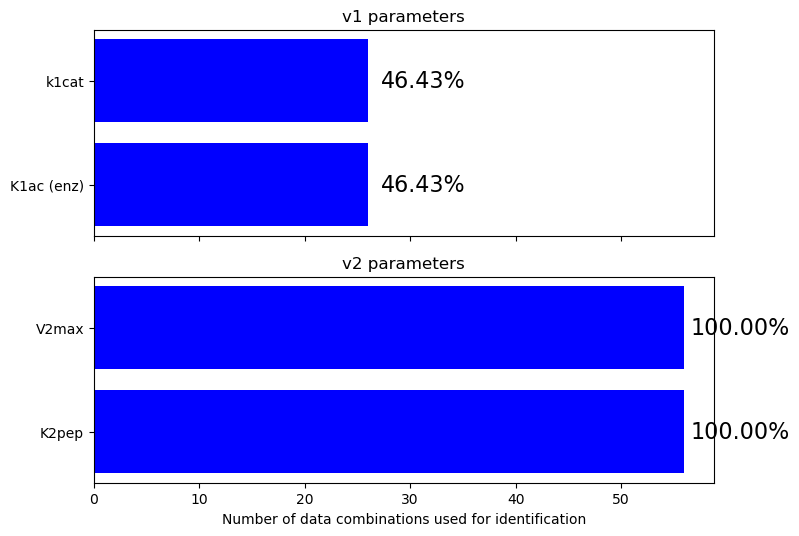

In [3]:
# plot parameter identifibaility for all fluxes using 2 data combinations
parameter_identifibaility_plot(max_parameter_2)

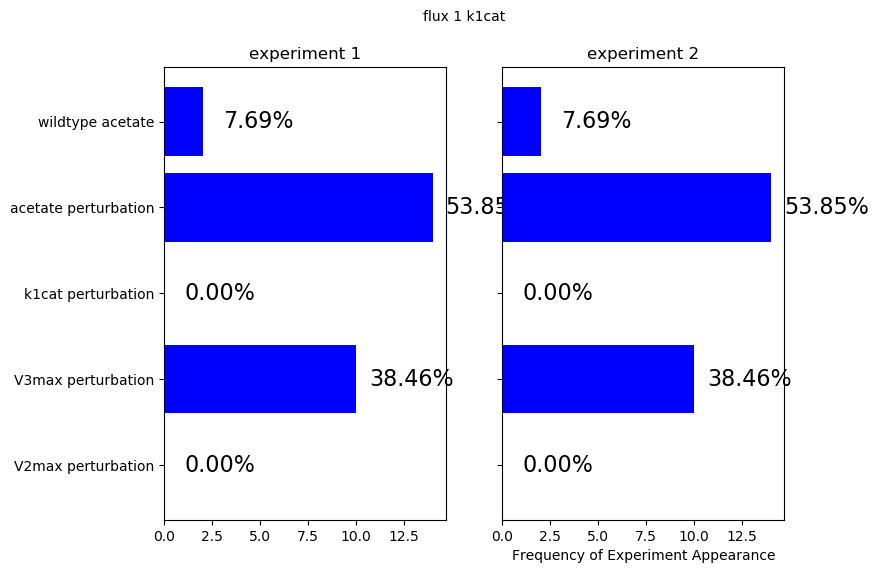

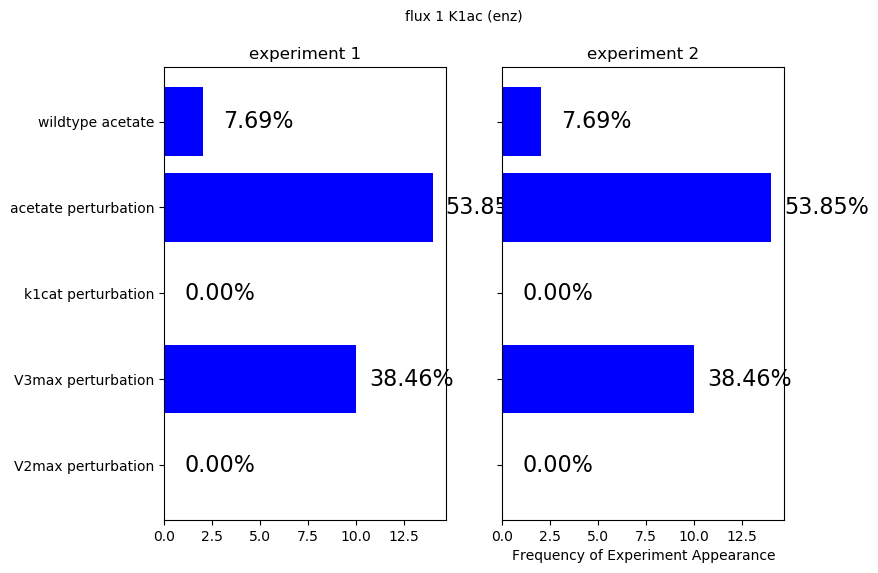

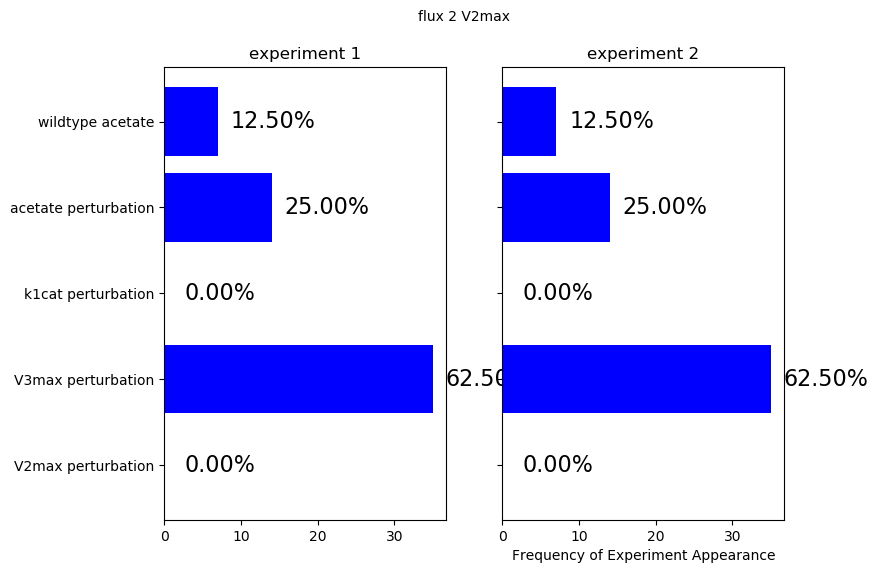

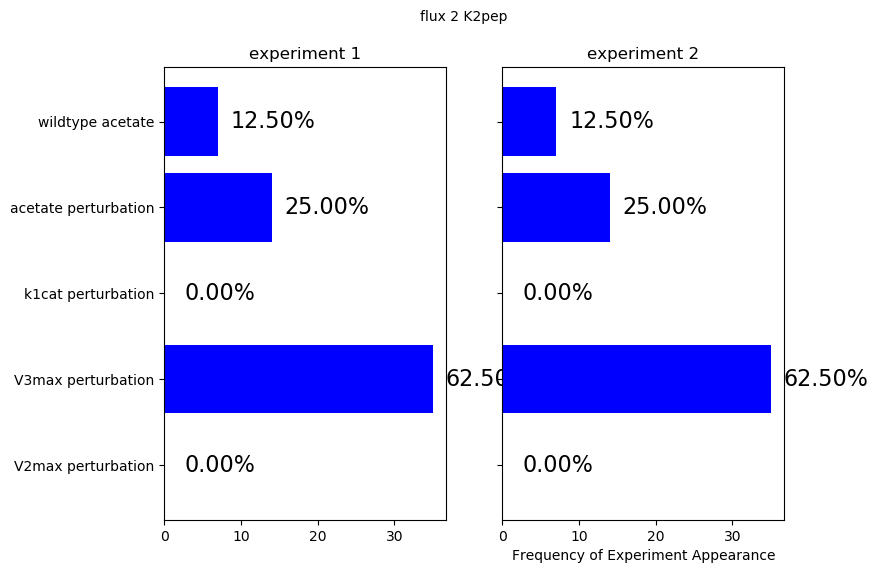

In [4]:
# plot experiment type in each position based on all parameter
# identifiable data combinations for each parameter
parameter_experiment_info_plot(experiment_info_2)

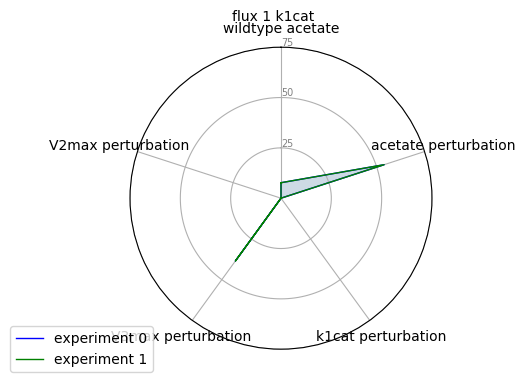

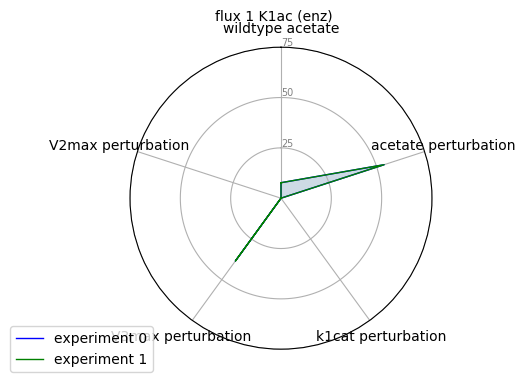

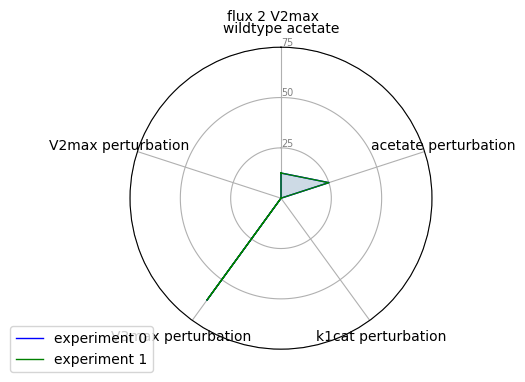

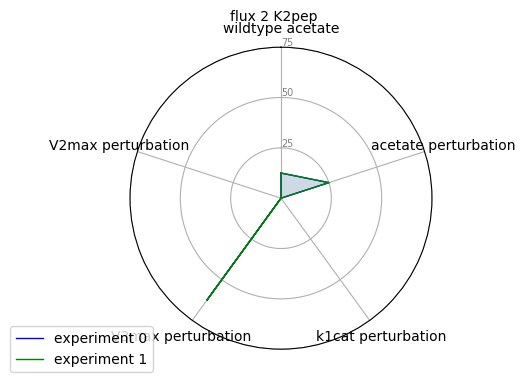

In [5]:
# spider plots for experiment type contrinution towards identifiable data sets
parameter_experiment_info_spider(experiment_info_2)

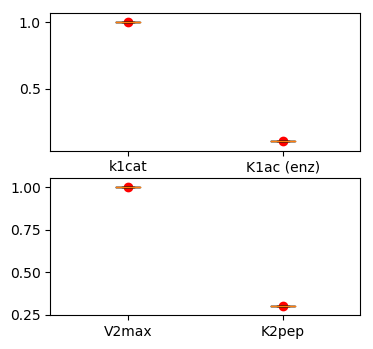

In [6]:
# plot true parameter values and determined parameter values
plot_parameter_values(true_value_2)

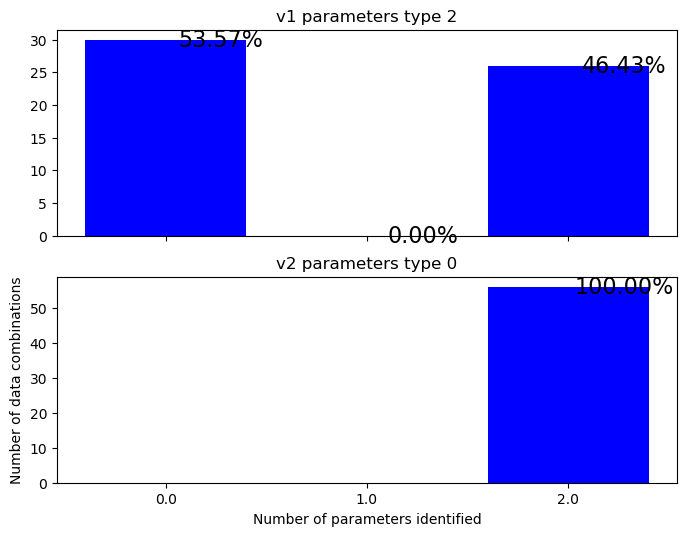

In [7]:
# plot utility of data sets (number of data sets identifying n, n-1, n-2, ...., 1, 0 parameters
data_utility_plot(data_list_2)

In [8]:
# get combination of 3 experiments and perform identifiability on all fluxes that require 3 data sets
print('Practical Identifiability Analysis of fluxes with 3 parameters \n')
# choose identifiability functions to test
ident_fun_choice_3 = [0]
# get combinations of experimental datasets
experimental_datasets_3_expts, \
    experiment_choice_3, combination_choice_3 = arrange_experimental_data(exp_xss, exp_fss, perturbation_details,
                                                                          experiments_per_set=3, flux_id=exp_flux_index,
                                                                          experiment_choice=[0, 1, 2, 3, 4, 5, 6, 7,
                                                                                             13, 14, 15, 16, 17])
ident_details_3 = flux_ident_3_data_combination(experimental_datasets_3_expts, choose=combination_choice_3,
                                                flux_ids=[3], flux_choice=[1], ident_fun_choice=ident_fun_choice_3)
print('Identifiability analysis for fluxes with 2 parameters complete.\n')
# data processing
data_list_3, max_parameter_3, true_value_3, experiment_info_3, \
    combined_data_list_3, combined_max_parameter_3, combined_true_value_3, \
    combined_experiment_info_3 = process_info_sample(ident_details_3,
                                                     experimental_datasets_3_expts,
                                                     experiment_type_indices,
                                                     ident_fun_choice=ident_fun_choice_3)

Practical Identifiability Analysis of fluxes with 3 parameters 

Identifiability for Dataset 1 of 1716: Original ID: 0

Identifiability for Dataset 2 of 1716: Original ID: 1

Identifiability for Dataset 3 of 1716: Original ID: 2

Identifiability for Dataset 4 of 1716: Original ID: 3

Identifiability for Dataset 5 of 1716: Original ID: 4

Identifiability for Dataset 6 of 1716: Original ID: 5

Identifiability for Dataset 7 of 1716: Original ID: 6

Identifiability for Dataset 8 of 1716: Original ID: 7

Identifiability for Dataset 9 of 1716: Original ID: 8

Identifiability for Dataset 10 of 1716: Original ID: 9

Identifiability for Dataset 11 of 1716: Original ID: 10

Identifiability for Dataset 12 of 1716: Original ID: 11

Identifiability for Dataset 13 of 1716: Original ID: 12

Identifiability for Dataset 14 of 1716: Original ID: 13

Identifiability for Dataset 15 of 1716: Original ID: 14

Identifiability for Dataset 16 of 1716: Original ID: 15

Identifiability for Dataset 17 of 1716: Or

Identifiability for Dataset 158 of 1716: Original ID: 157

Identifiability for Dataset 159 of 1716: Original ID: 158

Identifiability for Dataset 160 of 1716: Original ID: 159

Identifiability for Dataset 161 of 1716: Original ID: 160

Identifiability for Dataset 162 of 1716: Original ID: 161

Identifiability for Dataset 163 of 1716: Original ID: 162

Identifiability for Dataset 164 of 1716: Original ID: 163

Identifiability for Dataset 165 of 1716: Original ID: 164

Identifiability for Dataset 166 of 1716: Original ID: 165

Identifiability for Dataset 167 of 1716: Original ID: 166

Identifiability for Dataset 168 of 1716: Original ID: 167

Identifiability for Dataset 169 of 1716: Original ID: 168

Identifiability for Dataset 170 of 1716: Original ID: 169

Identifiability for Dataset 171 of 1716: Original ID: 170

Identifiability for Dataset 172 of 1716: Original ID: 171

Identifiability for Dataset 173 of 1716: Original ID: 172

Identifiability for Dataset 174 of 1716: Original ID: 17

Identifiability for Dataset 509 of 1716: Original ID: 508

Identifiability for Dataset 510 of 1716: Original ID: 509

Identifiability for Dataset 511 of 1716: Original ID: 510

Identifiability for Dataset 512 of 1716: Original ID: 511

Identifiability for Dataset 513 of 1716: Original ID: 512

Identifiability for Dataset 514 of 1716: Original ID: 513

Identifiability for Dataset 515 of 1716: Original ID: 514

Identifiability for Dataset 516 of 1716: Original ID: 515

Identifiability for Dataset 517 of 1716: Original ID: 516

Identifiability for Dataset 518 of 1716: Original ID: 517

Identifiability for Dataset 519 of 1716: Original ID: 518

Identifiability for Dataset 520 of 1716: Original ID: 519

Identifiability for Dataset 521 of 1716: Original ID: 520

Identifiability for Dataset 522 of 1716: Original ID: 521

Identifiability for Dataset 523 of 1716: Original ID: 522

Identifiability for Dataset 524 of 1716: Original ID: 523

Identifiability for Dataset 525 of 1716: Original ID: 52

Identifiability for Dataset 907 of 1716: Original ID: 906

Identifiability for Dataset 908 of 1716: Original ID: 907

Identifiability for Dataset 909 of 1716: Original ID: 908

Identifiability for Dataset 910 of 1716: Original ID: 909

Identifiability for Dataset 911 of 1716: Original ID: 910

Identifiability for Dataset 912 of 1716: Original ID: 911

Identifiability for Dataset 913 of 1716: Original ID: 912

Identifiability for Dataset 914 of 1716: Original ID: 913

Identifiability for Dataset 915 of 1716: Original ID: 914

Identifiability for Dataset 916 of 1716: Original ID: 915

Identifiability for Dataset 917 of 1716: Original ID: 916

Identifiability for Dataset 918 of 1716: Original ID: 917

Identifiability for Dataset 919 of 1716: Original ID: 918

Identifiability for Dataset 920 of 1716: Original ID: 919

Identifiability for Dataset 921 of 1716: Original ID: 920

Identifiability for Dataset 922 of 1716: Original ID: 921

Identifiability for Dataset 923 of 1716: Original ID: 92

Identifiability for Dataset 1282 of 1716: Original ID: 1281

Identifiability for Dataset 1283 of 1716: Original ID: 1282

Identifiability for Dataset 1284 of 1716: Original ID: 1283

Identifiability for Dataset 1285 of 1716: Original ID: 1284

Identifiability for Dataset 1286 of 1716: Original ID: 1285

Identifiability for Dataset 1287 of 1716: Original ID: 1286

Identifiability for Dataset 1288 of 1716: Original ID: 1287

Identifiability for Dataset 1289 of 1716: Original ID: 1288

Identifiability for Dataset 1290 of 1716: Original ID: 1289

Identifiability for Dataset 1291 of 1716: Original ID: 1290

Identifiability for Dataset 1292 of 1716: Original ID: 1291

Identifiability for Dataset 1293 of 1716: Original ID: 1292

Identifiability for Dataset 1294 of 1716: Original ID: 1293

Identifiability for Dataset 1295 of 1716: Original ID: 1294

Identifiability for Dataset 1296 of 1716: Original ID: 1295

Identifiability for Dataset 1297 of 1716: Original ID: 1296

Identifiability for Data

Identifiability for Dataset 1641 of 1716: Original ID: 1640

Identifiability for Dataset 1642 of 1716: Original ID: 1641

Identifiability for Dataset 1643 of 1716: Original ID: 1642

Identifiability for Dataset 1644 of 1716: Original ID: 1643

Identifiability for Dataset 1645 of 1716: Original ID: 1644

Identifiability for Dataset 1646 of 1716: Original ID: 1645

Identifiability for Dataset 1647 of 1716: Original ID: 1646

Identifiability for Dataset 1648 of 1716: Original ID: 1647

Identifiability for Dataset 1649 of 1716: Original ID: 1648

Identifiability for Dataset 1650 of 1716: Original ID: 1649

Identifiability for Dataset 1651 of 1716: Original ID: 1650

Identifiability for Dataset 1652 of 1716: Original ID: 1651

Identifiability for Dataset 1653 of 1716: Original ID: 1652

Identifiability for Dataset 1654 of 1716: Original ID: 1653

Identifiability for Dataset 1655 of 1716: Original ID: 1654

Identifiability for Dataset 1656 of 1716: Original ID: 1655

Identifiability for Data

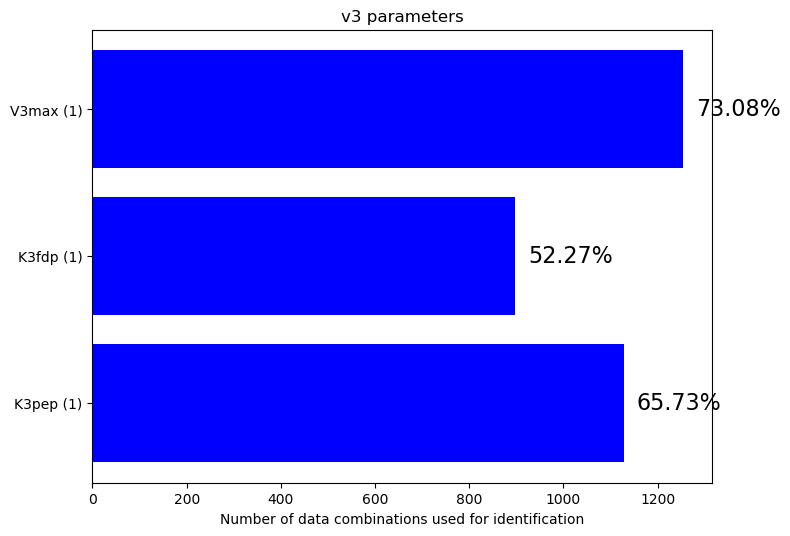

In [9]:
# plot parameter identifibaility for all fluxes using 3 data combinations
parameter_identifibaility_plot(max_parameter_3)

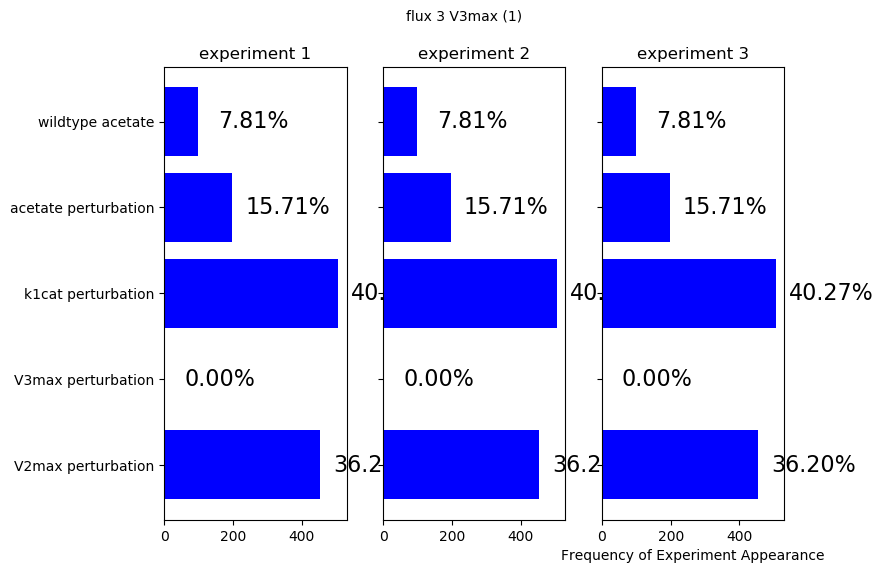

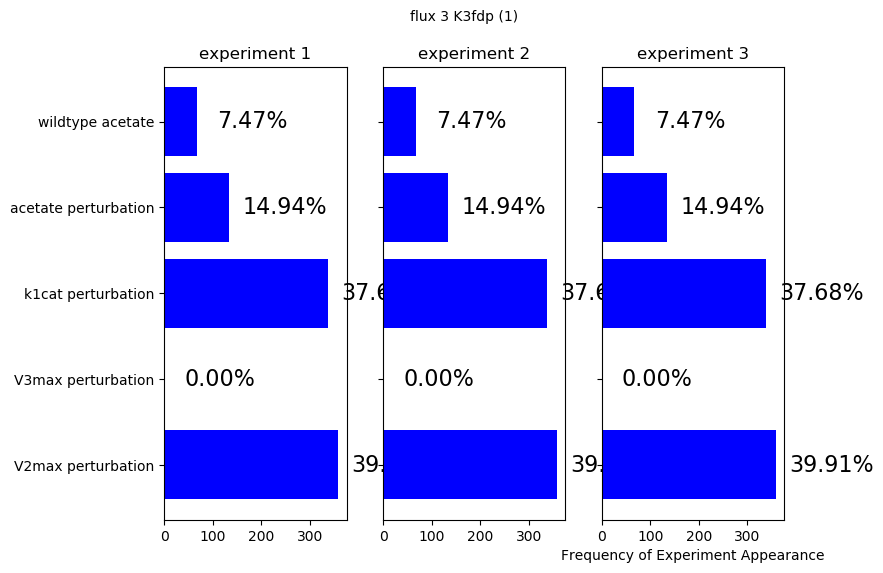

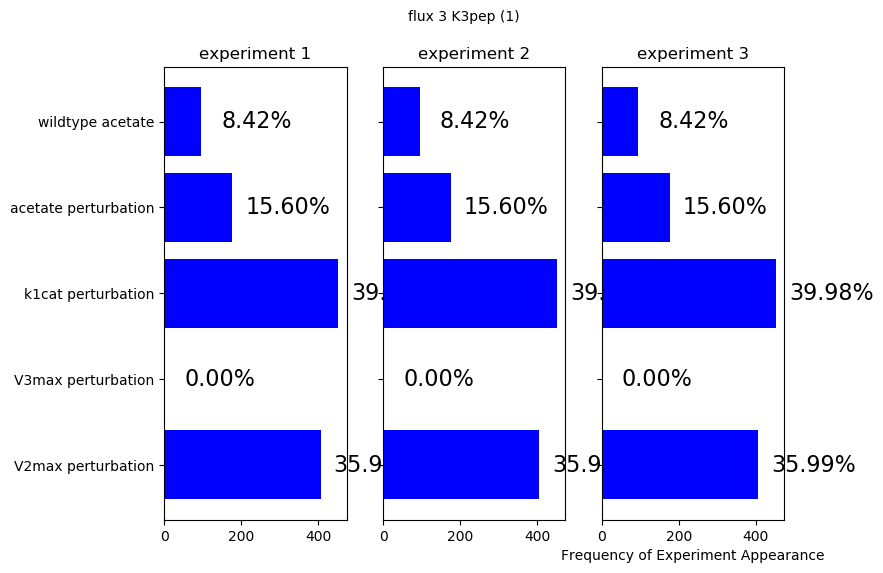

In [10]:
# plot experiment type in each position based on all parameter
# identifiable data combinations for each parameter
parameter_experiment_info_plot(experiment_info_3)

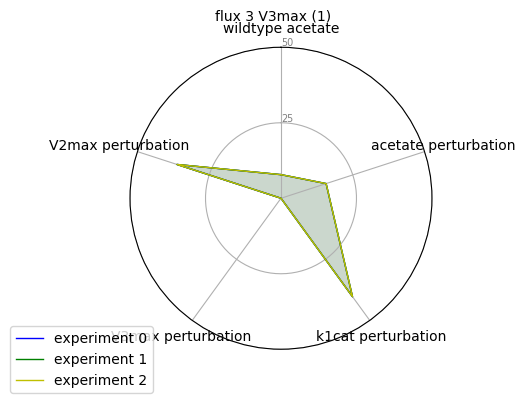

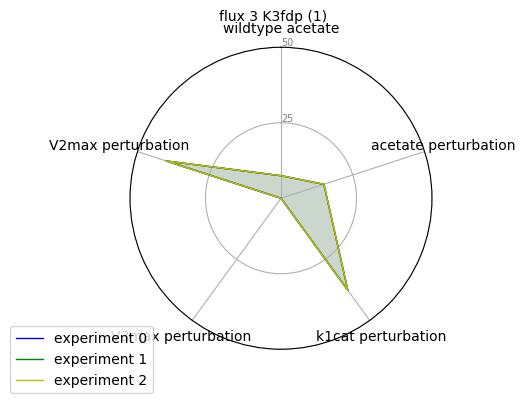

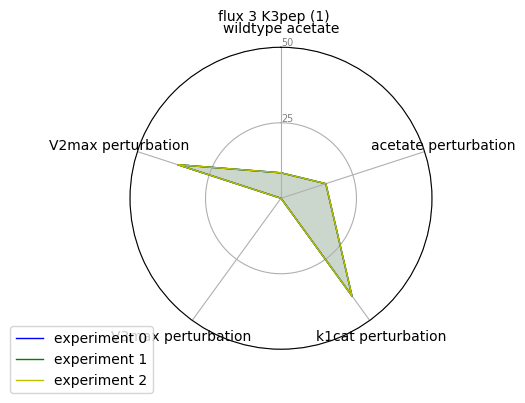

In [11]:
# spider plots for experiment type contrinution towards identifiable data sets
parameter_experiment_info_spider(experiment_info_3)

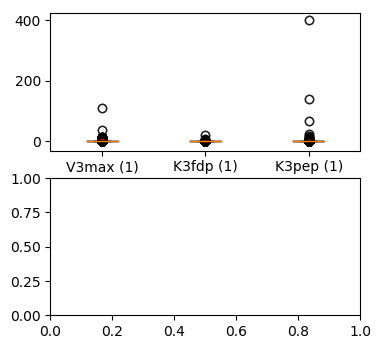

In [12]:
# plot true parameter values and determined parameter values
plot_parameter_values(true_value_3)

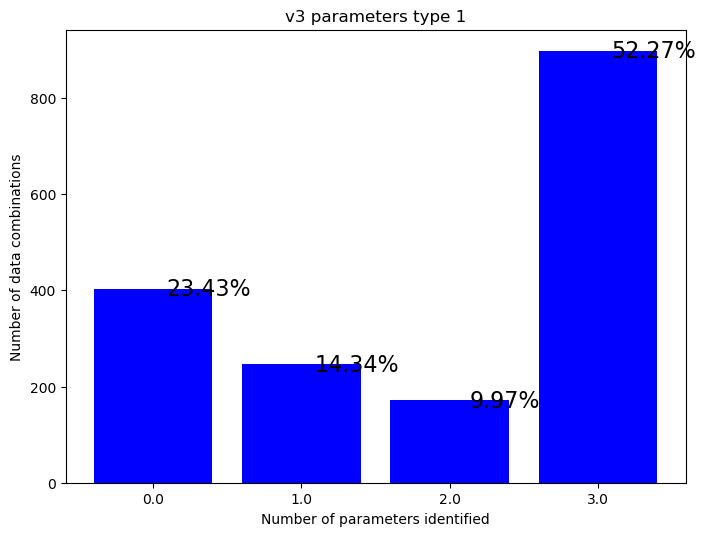

In [13]:
# plot utility of data sets (number of data sets identifying n, n-1, n-2, ...., 1, 0 parameters
data_utility_plot(data_list_3)

In [14]:
# get combination of 3 experiments and perform identifiability on all fluxes that require 3 data sets
print('Practical Identifiability Analysis of fluxes with 3 parameters \n')
# choose identifiability functions to test
ident_fun_choice_3 = [0]
# get combinations of experimental datasets
experimental_datasets_3_expts, \
    experiment_choice_3, combination_choice_3 = arrange_experimental_data(exp_xss, exp_fss, perturbation_details,
                                                                          experiments_per_set=3, flux_id=exp_flux_index,
                                                                          experiment_choice=[0, 1, 2, 3, 4, 5, 6, 7,
                                                                                             13, 14, 15, 16, 17])
ident_details_3 = flux_ident_3_data_combination(experimental_datasets_3_expts, choose=combination_choice_3,
                                                flux_ids=[3], flux_choice=[2], ident_fun_choice=ident_fun_choice_3)
print('Identifiability analysis for fluxes with 2 parameters complete.\n')
# data processing
data_list_3, max_parameter_3, true_value_3, experiment_info_3, \
    combined_data_list_3, combined_max_parameter_3, combined_true_value_3, \
    combined_experiment_info_3 = process_info_sample(ident_details_3,
                                                     experimental_datasets_3_expts,
                                                     experiment_type_indices,
                                                     ident_fun_choice=ident_fun_choice_3)

Practical Identifiability Analysis of fluxes with 3 parameters 

Identifiability for Dataset 1 of 1716: Original ID: 0

Identifiability for Dataset 2 of 1716: Original ID: 1

Identifiability for Dataset 3 of 1716: Original ID: 2

Identifiability for Dataset 4 of 1716: Original ID: 3

Identifiability for Dataset 5 of 1716: Original ID: 4

Identifiability for Dataset 6 of 1716: Original ID: 5

Identifiability for Dataset 7 of 1716: Original ID: 6

Identifiability for Dataset 8 of 1716: Original ID: 7

Identifiability for Dataset 9 of 1716: Original ID: 8

Identifiability for Dataset 10 of 1716: Original ID: 9

Identifiability for Dataset 11 of 1716: Original ID: 10

Identifiability for Dataset 12 of 1716: Original ID: 11

Identifiability for Dataset 13 of 1716: Original ID: 12

Identifiability for Dataset 14 of 1716: Original ID: 13

Identifiability for Dataset 15 of 1716: Original ID: 14

Identifiability for Dataset 16 of 1716: Original ID: 15

Identifiability for Dataset 17 of 1716: Or

Identifiability for Dataset 459 of 1716: Original ID: 458

Identifiability for Dataset 460 of 1716: Original ID: 459

Identifiability for Dataset 461 of 1716: Original ID: 460

Identifiability for Dataset 462 of 1716: Original ID: 461

Identifiability for Dataset 463 of 1716: Original ID: 462

Identifiability for Dataset 464 of 1716: Original ID: 463

Identifiability for Dataset 465 of 1716: Original ID: 464

Identifiability for Dataset 466 of 1716: Original ID: 465

Identifiability for Dataset 467 of 1716: Original ID: 466

Identifiability for Dataset 468 of 1716: Original ID: 467

Identifiability for Dataset 469 of 1716: Original ID: 468

Identifiability for Dataset 470 of 1716: Original ID: 469

Identifiability for Dataset 471 of 1716: Original ID: 470

Identifiability for Dataset 472 of 1716: Original ID: 471

Identifiability for Dataset 473 of 1716: Original ID: 472

Identifiability for Dataset 474 of 1716: Original ID: 473

Identifiability for Dataset 475 of 1716: Original ID: 47

Identifiability for Dataset 834 of 1716: Original ID: 833

Identifiability for Dataset 835 of 1716: Original ID: 834

Identifiability for Dataset 836 of 1716: Original ID: 835

Identifiability for Dataset 837 of 1716: Original ID: 836

Identifiability for Dataset 838 of 1716: Original ID: 837

Identifiability for Dataset 839 of 1716: Original ID: 838

Identifiability for Dataset 840 of 1716: Original ID: 839

Identifiability for Dataset 841 of 1716: Original ID: 840

Identifiability for Dataset 842 of 1716: Original ID: 841

Identifiability for Dataset 843 of 1716: Original ID: 842

Identifiability for Dataset 844 of 1716: Original ID: 843

Identifiability for Dataset 845 of 1716: Original ID: 844

Identifiability for Dataset 846 of 1716: Original ID: 845

Identifiability for Dataset 847 of 1716: Original ID: 846

Identifiability for Dataset 848 of 1716: Original ID: 847

Identifiability for Dataset 849 of 1716: Original ID: 848

Identifiability for Dataset 850 of 1716: Original ID: 84

Identifiability for Dataset 1206 of 1716: Original ID: 1205

Identifiability for Dataset 1207 of 1716: Original ID: 1206

Identifiability for Dataset 1208 of 1716: Original ID: 1207

Identifiability for Dataset 1209 of 1716: Original ID: 1208

Identifiability for Dataset 1210 of 1716: Original ID: 1209

Identifiability for Dataset 1211 of 1716: Original ID: 1210

Identifiability for Dataset 1212 of 1716: Original ID: 1211

Identifiability for Dataset 1213 of 1716: Original ID: 1212

Identifiability for Dataset 1214 of 1716: Original ID: 1213

Identifiability for Dataset 1215 of 1716: Original ID: 1214

Identifiability for Dataset 1216 of 1716: Original ID: 1215

Identifiability for Dataset 1217 of 1716: Original ID: 1216

Identifiability for Dataset 1218 of 1716: Original ID: 1217

Identifiability for Dataset 1219 of 1716: Original ID: 1218

Identifiability for Dataset 1220 of 1716: Original ID: 1219

Identifiability for Dataset 1221 of 1716: Original ID: 1220

Identifiability for Data

Identifiability for Dataset 1568 of 1716: Original ID: 1567

Identifiability for Dataset 1569 of 1716: Original ID: 1568

Identifiability for Dataset 1570 of 1716: Original ID: 1569

Identifiability for Dataset 1571 of 1716: Original ID: 1570

Identifiability for Dataset 1572 of 1716: Original ID: 1571

Identifiability for Dataset 1573 of 1716: Original ID: 1572

Identifiability for Dataset 1574 of 1716: Original ID: 1573

Identifiability for Dataset 1575 of 1716: Original ID: 1574

Identifiability for Dataset 1576 of 1716: Original ID: 1575

Identifiability for Dataset 1577 of 1716: Original ID: 1576

Identifiability for Dataset 1578 of 1716: Original ID: 1577

Identifiability for Dataset 1579 of 1716: Original ID: 1578

Identifiability for Dataset 1580 of 1716: Original ID: 1579

Identifiability for Dataset 1581 of 1716: Original ID: 1580

Identifiability for Dataset 1582 of 1716: Original ID: 1581

Identifiability for Dataset 1583 of 1716: Original ID: 1582

Identifiability for Data

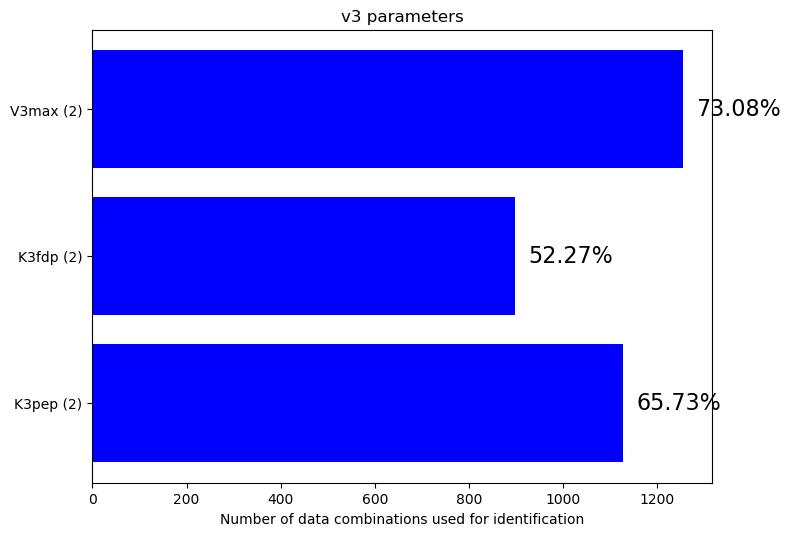

In [15]:
# plot parameter identifibaility for all fluxes using 3 data combinations
parameter_identifibaility_plot(max_parameter_3)

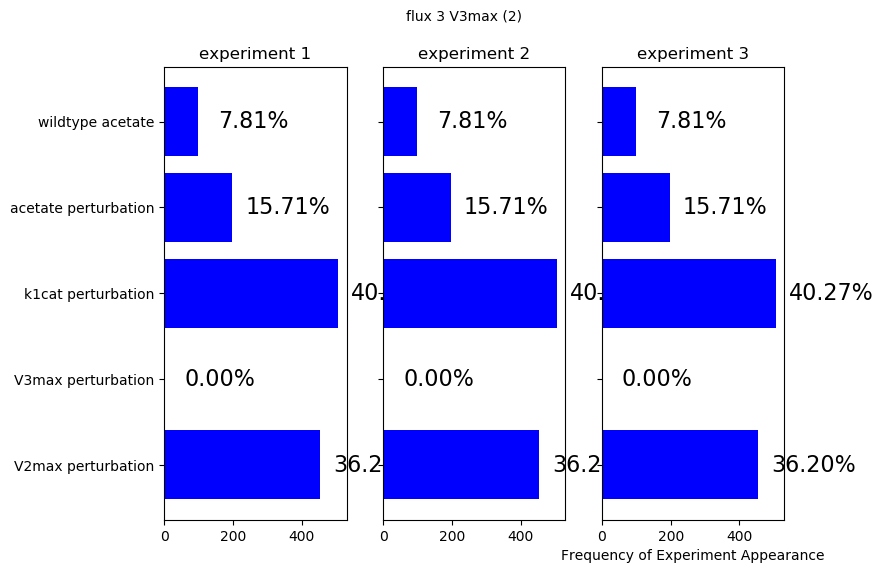

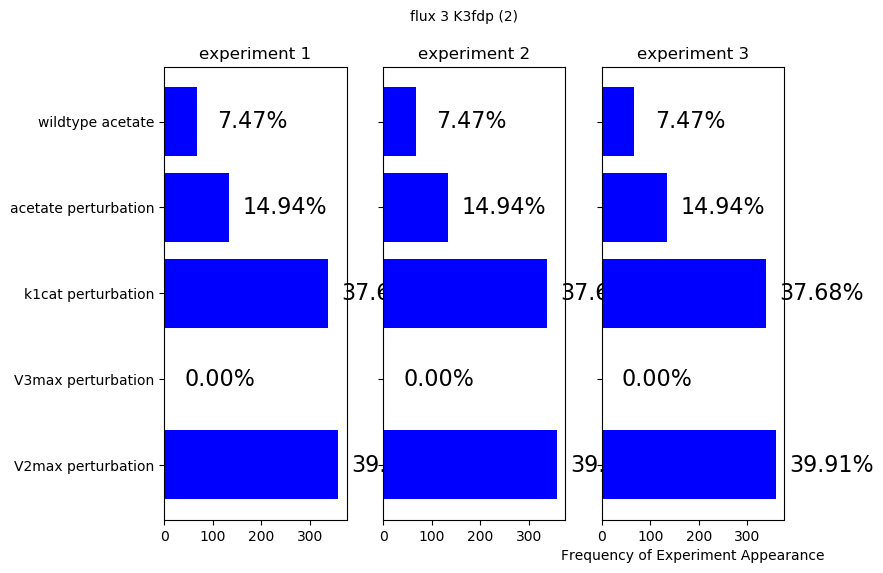

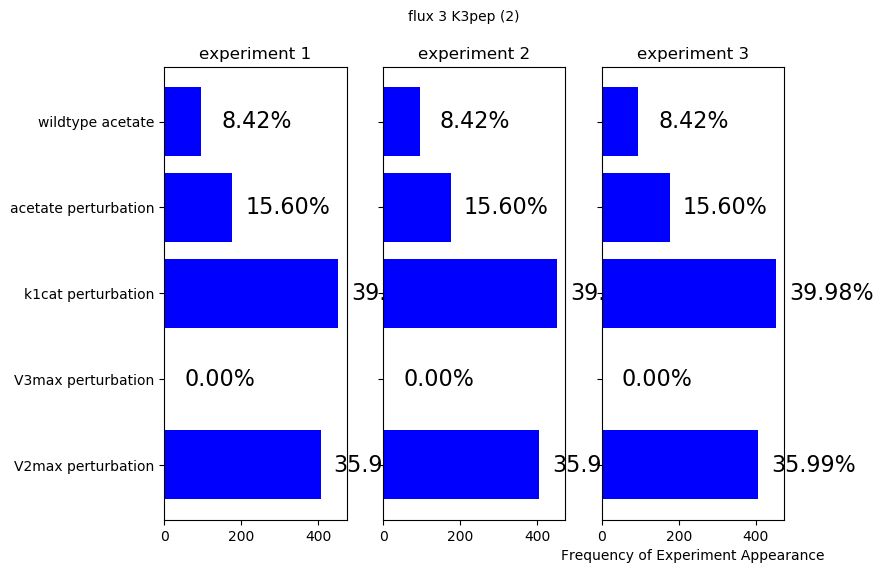

In [16]:
# plot experiment type in each position based on all parameter
# identifiable data combinations for each parameter
parameter_experiment_info_plot(experiment_info_3)

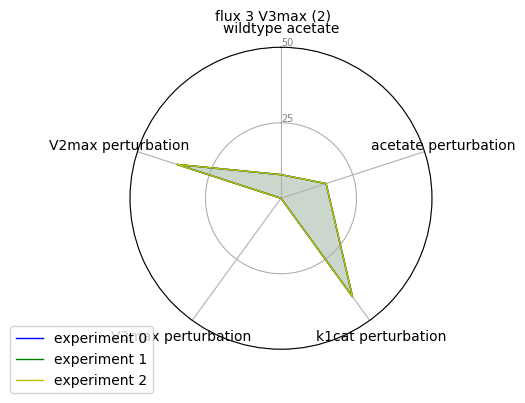

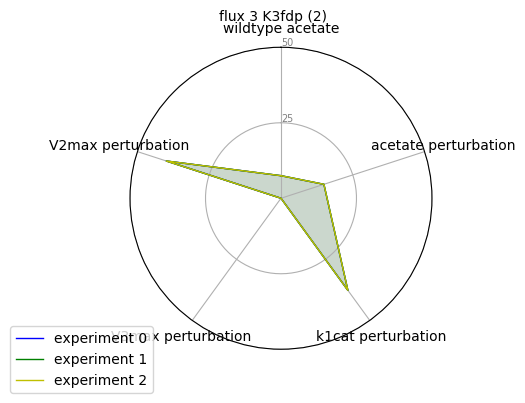

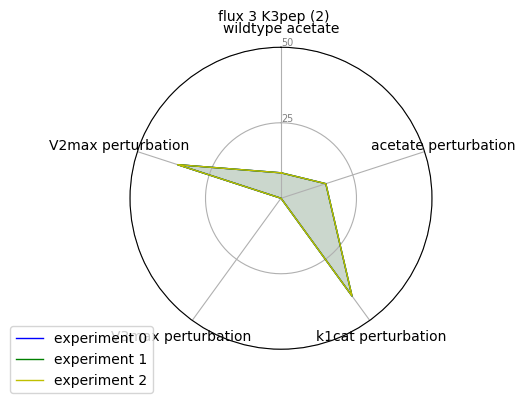

In [17]:
# spider plots for experiment type contrinution towards identifiable data sets
parameter_experiment_info_spider(experiment_info_3)

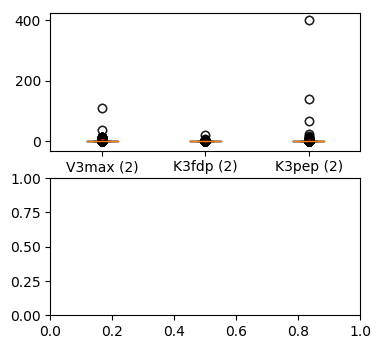

In [18]:
# plot true parameter values and determined parameter values
plot_parameter_values(true_value_3)

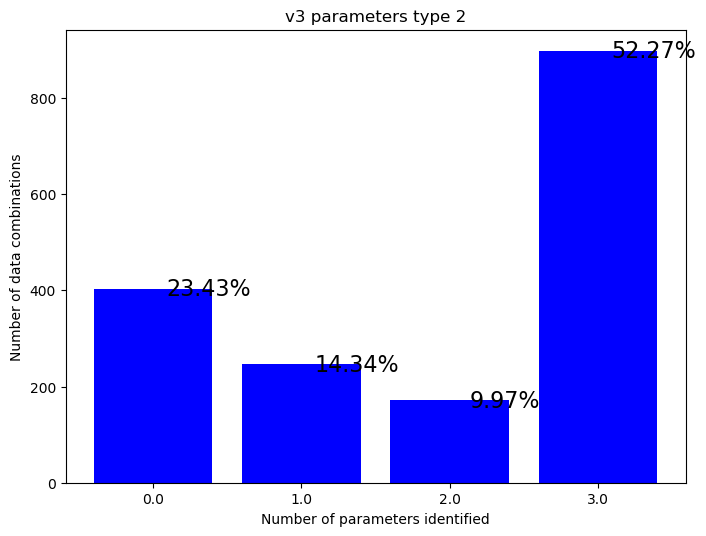

In [19]:
# plot utility of data sets (number of data sets identifying n, n-1, n-2, ...., 1, 0 parameters
data_utility_plot(data_list_3)